Data(x=[5, 1], edge_index=[2, 6])


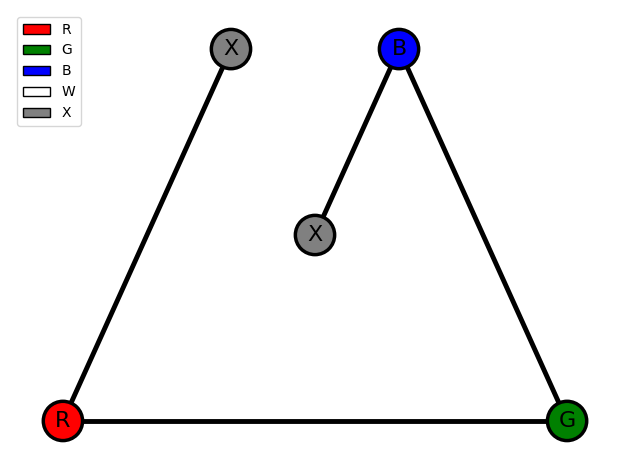

None


In [7]:
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

# Mapping from one-hot index to color name and matplotlib color
IDX2COLOR = {
    0: ('R', 'red'),
    1: ('G', 'green'),
    2: ('B', 'blue'),
    3: ('W', 'white'),
    4: ('X', 'gray'),
}

COLOR2IDX = {'red': 0, 'green': 1, 'blue': 2, 'white': 3, 'gray': 4}

def draw_color_graph(graph: Data, is_retrieved=False):
    G = to_networkx(graph, node_attrs=['x'], to_undirected=True)

    # Try planar layout if the graph is planar
    if nx.check_planarity(G)[0]:
        pos = nx.planar_layout(G)
    else:
        pos = nx.spring_layout(G, seed=7)

    node_labels = []
    node_colors = []

    for i in range(graph.num_nodes):
        if is_retrieved:
            color = getattr(graph, "node_color")[i]
            label = color[0].capitalize()
        else:
            idx =  int(graph.x[i].item())
            label, color = IDX2COLOR[idx]
        node_labels.append(label)
        node_colors.append(color)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, edgecolors='black', linewidths=2.5)
    nx.draw_networkx_edges(G, pos, width=3.5)

    label_dict = {i: node_labels[i] for i in range(graph.num_nodes)}
    nx.draw_networkx_labels(G, pos, labels=label_dict, font_size=16, font_color='black')

    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color, edgecolor='black', label=label) for idx, (label, color) in
                       IDX2COLOR.items()]
    plt.legend(handles=legend_elements, loc='upper left', frameon=True)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 2) Specify your nodes’ colors
colors = ['red', 'green', 'blue', 'gray', 'gray']  # three nodes

# 3) Encode node colors as integer features of shape [num_nodes, 1]
x = torch.tensor([[COLOR2IDX[c]] for c in colors], dtype=torch.long)

# If you’d rather use one-hot vectors, you could do:
# x = torch.nn.functional.one_hot(x.squeeze(1), num_classes=len(COLOR2IDX)).to(torch.float)

# 4) Define the (undirected) edges in COO format
#    Here, edges between 0–1 and 1–2:
edge_index = torch.tensor([
    [0, 1, 1, 2, 0, 2],  # source nodes
    [1, 0, 2, 1, 3, 4],  # target nodes
], dtype=torch.long)

# 5) Build the Data object (no edge_attr passed → defaults to None)
graph = Data(x=x, edge_index=edge_index)

print(graph)
print(draw_color_graph(graph))
# Data(x=[3, 1], edge_index=[2, 4])

In [1]:
from torch import utils
import torchhd

# 1) your original list of color names
color_names = ['red', 'green', 'blue', 'white', 'gray']

# 2) generate one random HV per color
d = 100
color_hvs = torchhd.random(len(color_names), d)

# 3) generate random hypervectors for variable names
color_vars = torchhd.random(len(color_names), d)

# 4) build a single memory hypervector by binding vars to colors and bundling
bindings = [torchhd.bind(color_vars[i], color_hvs[i]) for i in range(len(color_names))]
memory = torchhd.bundle(*bindings)

TypeError: bundle() takes 2 positional arguments but 5 were given